# "House Prices: Advanced Regression Techniques" Kaggle Competition

Submission Notebook by Richard Kaldenhoven

Competition information available at:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


## 1. Problem Definition

The objective of this notebook is to develop a machine learning model that can predict house sale prices, given housing information such as the overall quality, living area, garage size, and neighborhood. The data used in this problem is the Ames Housing Dataset, which contains 79 variables describing features of residential homes in Ames, Iowa. The features of the dataset are what the model will learn from, and the sale price is the target to predict. The data description is quite large, so it is provided in the Appendix section at the end of this notebook.

The data is split into two sets: a training set and a test set. The training set contains house information as well as the sale price for each house, and a model will be developed to fit this data. The test set contains house information but no sale price, since the model will be used to predict the sale prices from the house information. 

The predictions are submitted to Kaggle for scoring, where the Root Mean Square Error (RMSE) between the logarithm of the predicted sale price and the logarithm of the actual sale price is the evaluation metric used. By taking logarithms of the sale prices, errors in predicting expensive houses and cheap houses will effect the RMSE equally.

## 2. Load Data

In this section the data is loaded, previewed, and any missing values are identified using the following code:

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
# set pandas dataframe options
pd.set_option('display.max_rows', 1460)
pd.set_option('display.max_columns', 81)

# remove matplotlib display warning
plt.rcParams.update({'figure.max_open_warning': 0})

In [232]:
df_train = pd.read_csv('train.csv')

In [233]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [234]:
df_train.shape

(1460, 81)

In [237]:
df_test = pd.read_csv('test.csv')

In [238]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [239]:
df_test.shape

(1459, 80)

## 3. Exploratory Data Analysis

In this section the training set is analyzed in order to find how the features of the data influence the sale prices of homes. The quantitative (numerical) features of the data are analyzed first, followed by the qualitative (categorical) features.

### 3.1 Quantitative Features

To start analyzing the quantitative features, the distribution of `SalePrice` is plotted:

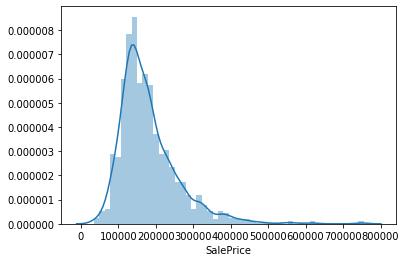

In [241]:
sns.distplot(df_train['SalePrice'],bins=50)

In [242]:
print('Mean SalePrice: $', round(df_train['SalePrice'].mean(), 0))
print('Standard Deviation of SalePrice: $', round(df_train['SalePrice'].std(), 0))

Mean SalePrice: $ 180921.0
Standard Deviation of SalePrice: $ 79443.0


The distribution of `SalePrice` is right skewed, with a mean of \\$180921 and a standard deviation of \$79443.

The correlation coefficients of the features with `SalePrice` are calculated and shown below:

In [243]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

The coefficients are easier to visualize in a heatmap, shown below, with the most strongly correlated features with `SalePrice` in the upper left corner.

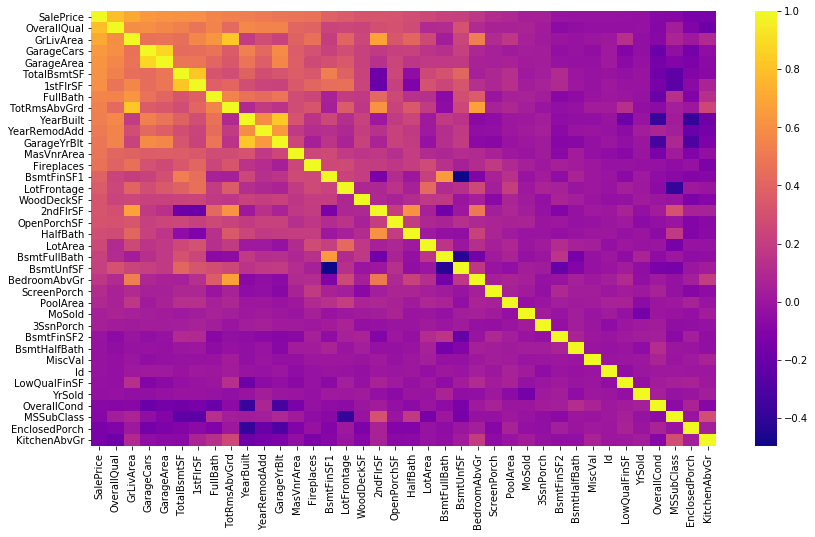

In [244]:
plt.figure(figsize=(14,8))
corr_list = df_train.corr()['SalePrice'].sort_values(ascending=False).index.to_list()
sns.heatmap(df_train[corr_list].corr(),cmap='plasma')

# because heatmap data is sorted, most correlated is at the upper left corner

Zooming in on the top 10 most correlated features:

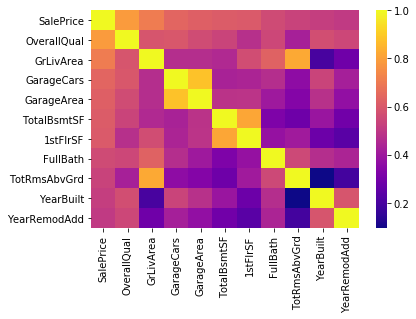

In [245]:
# top 10 most correlated with SalePrice
df_corr_col = ['SalePrice',
               'OverallQual',
               'GrLivArea',
               'GarageCars',
               'GarageArea',
               'TotalBsmtSF',
               '1stFlrSF',
               'FullBath',
               'TotRmsAbvGrd',
               'YearBuilt',
               'YearRemodAdd']

sns.heatmap(df_train[df_corr_col].corr(),cmap='plasma')

There are many features that appear to be multicollinear, such as GrLivArea and TotRmsAbvGrd, which is expected from the dataset since many features express similar information about the home in different ways. For example, GarageCars and GarageArea both express the size of a garage but in two different ways.

Scatterplots are plotted to show the effect of each feature on `SalePrice`:

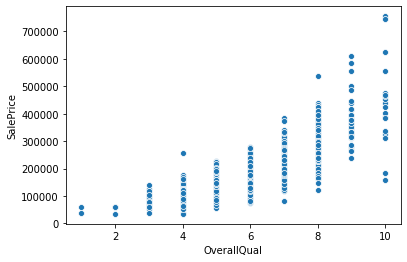

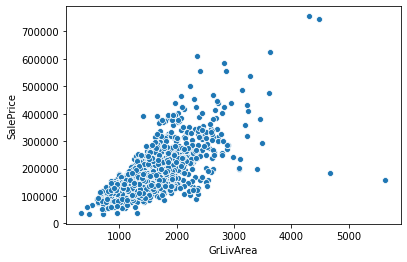

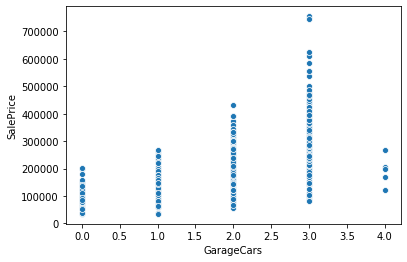

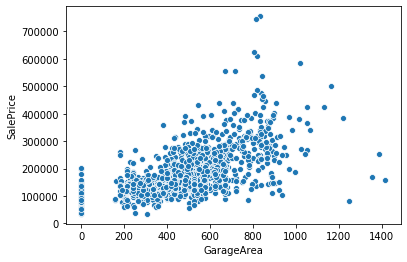

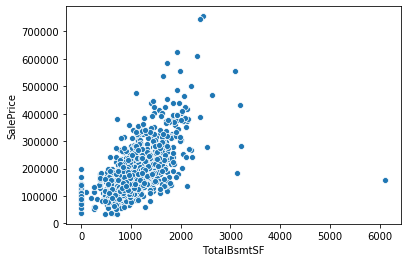

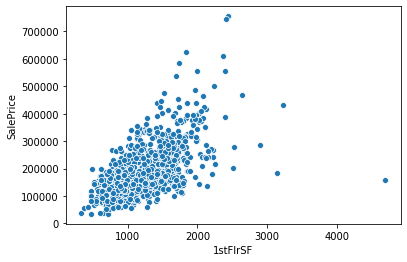

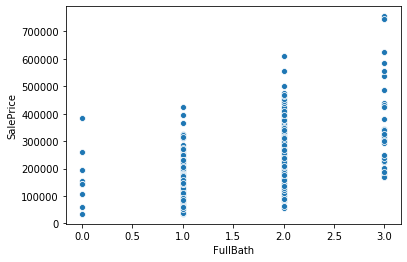

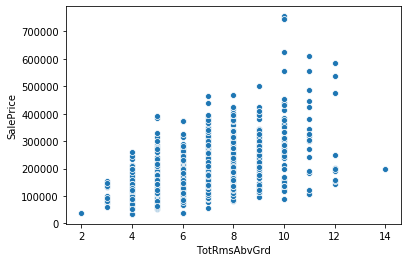

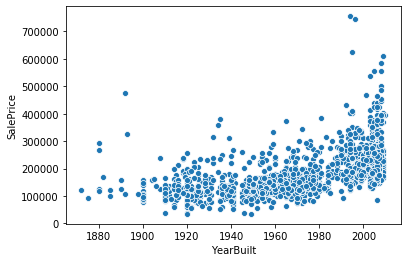

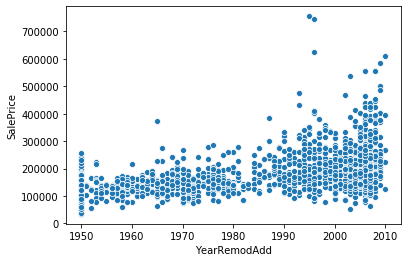

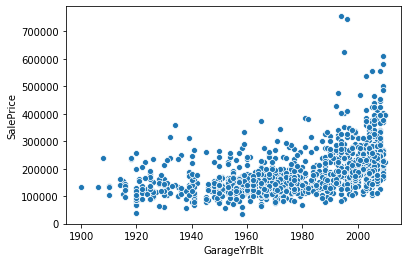

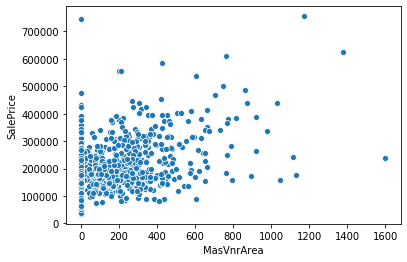

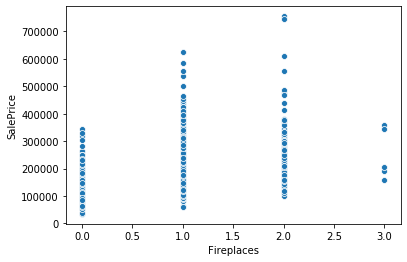

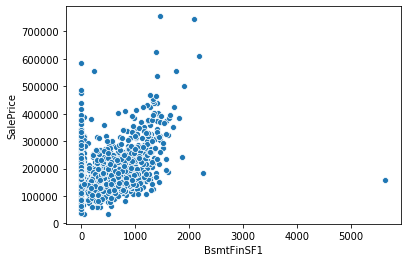

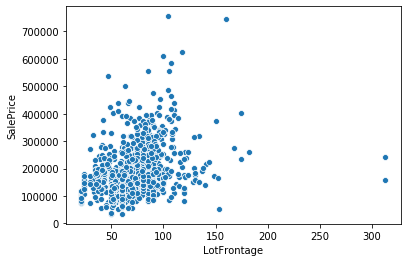

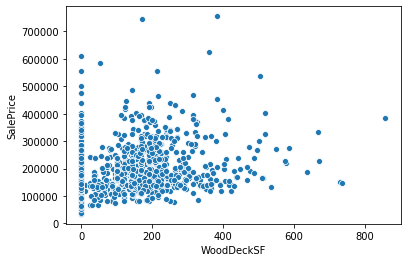

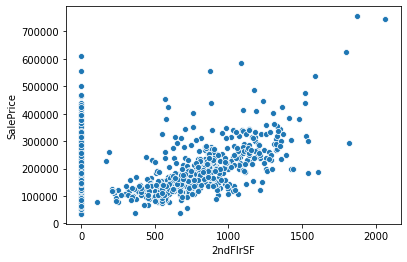

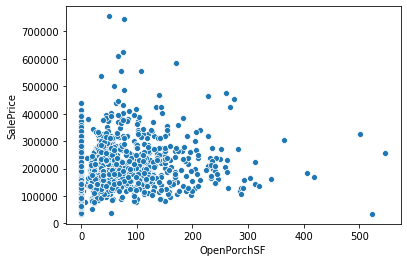

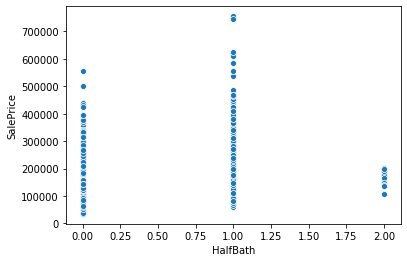

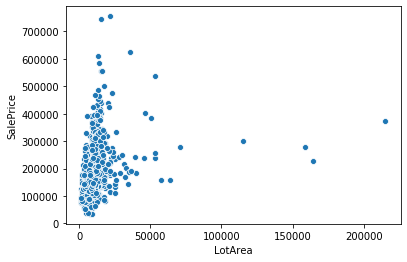

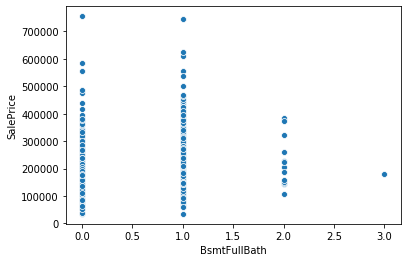

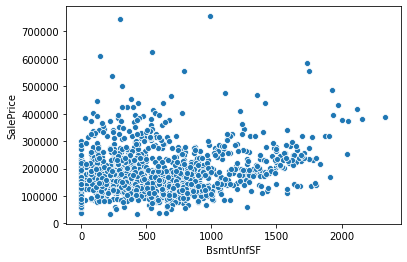

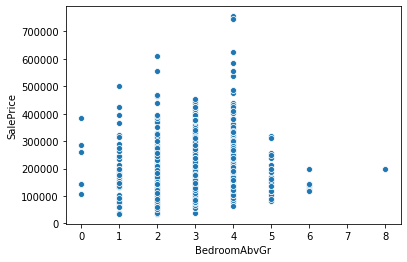

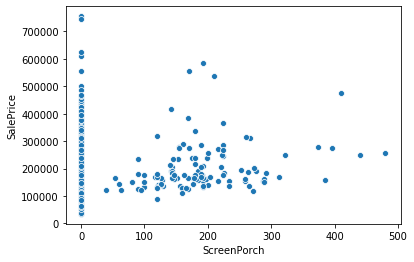

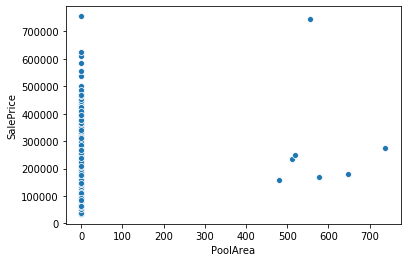

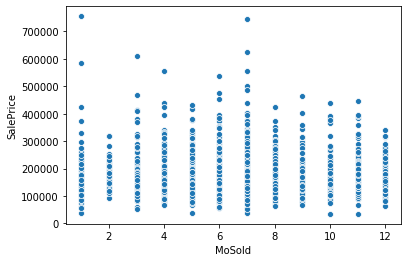

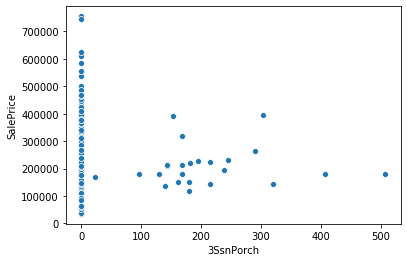

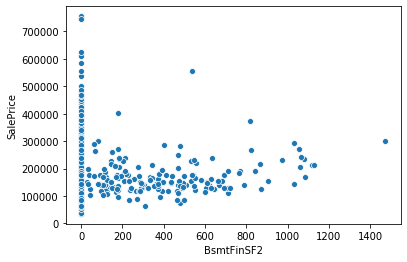

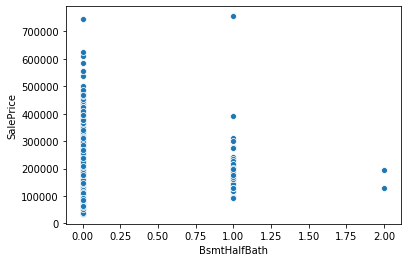

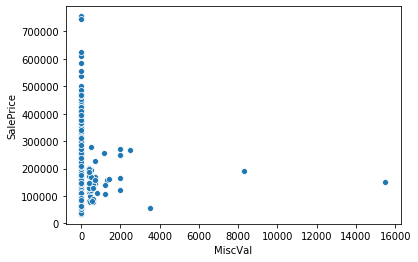

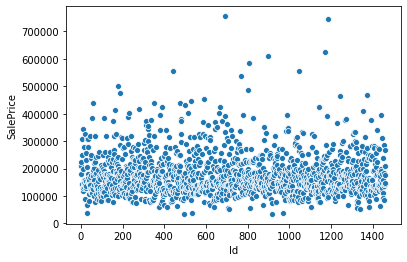

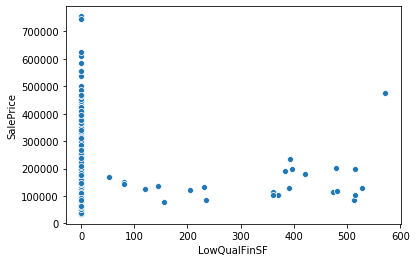

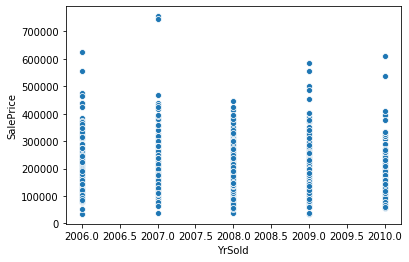

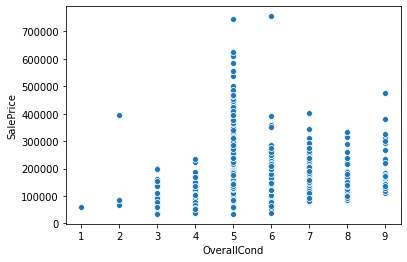

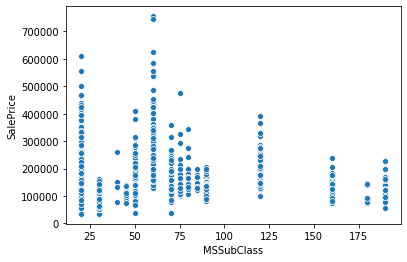

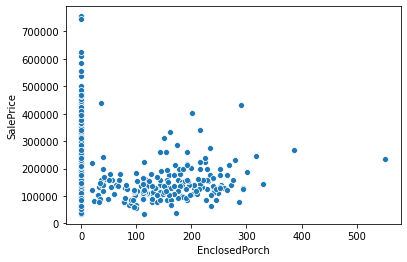

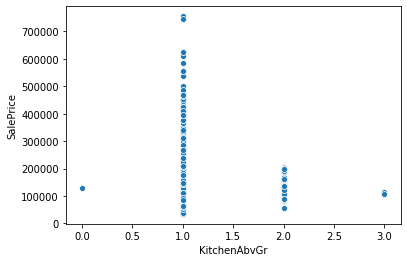

In [246]:
df_train_quant = df_train[corr_list]
for i, col in enumerate(df_train_quant.columns[1:]):
    plt.figure(i)
    g = sns.scatterplot(x=col, y='SalePrice',data=df_train_quant)

The graphs are plotted in the order of decreasing correlation with SalePrice.

As expected from the correlation heatmap, many of the top 10 quantitative features show a positive influence on the SalePrice, and the relationships look like they could be described with a linear model. 

There are instances where a linear relationship does not hold, in other words, the feature does not matter for the SalePrice. For example, on the GarageArea plot, there are many values of 0 (no garage) but they have a range of SalePrice's. Features that have many values of 0 appear to be missing that feature, however it is not yet proven whether that may have influenced the price for better/worse.

For features like FullBath that take on discrete values, there is not as strong a relationship with SalePrice, as a house with 1.0 full bathrooms can have a similar price as a home with 2.0 or 3.0.

Surprisingly, YearBuilt does not appear to have that much influence on SalePrice.



A boxplot shows the relationship between OverallQual and SalePrice slightly better, and it appears that in general as OverallQual increases, SalePrice increases. Also, as OverallQual increases, the variance in SalePrice shows that other features of the home are important for determining the price, as there is overlap between quartile ranges for many values of OverallQual.

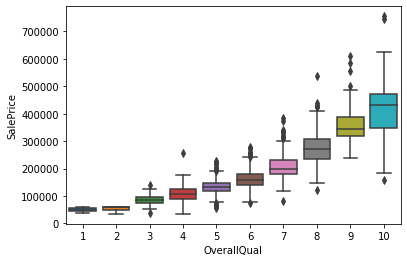

In [247]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

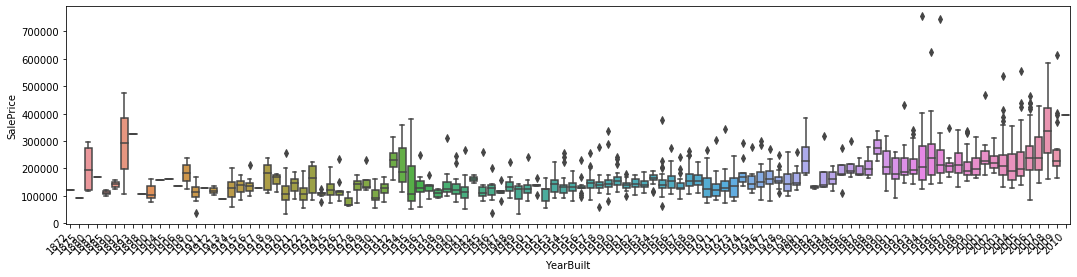

In [248]:
plt.figure(figsize=(18,4))
plt.tight_layout()
g = sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right");

There is not as strong a relationship between YearBuilt and SalePrice as was expected. While it is true that newer built homes can sell for more than older homes, it is not certain, especially given the variance in the data.

### 3.2 Qualitative Features 

To understand the relationship between the qualitative variables and the `SalePrice`, box plots are drawn for each feature, as shown below.

In [249]:
# get qualitative feature columns out of df_train by dropping quantitative columns except SalePrice
df_train_qual = df_train.drop(corr_list[1:],axis=1)

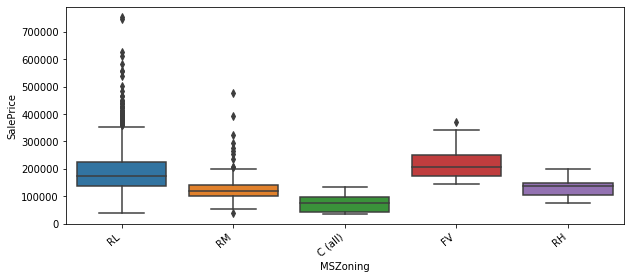

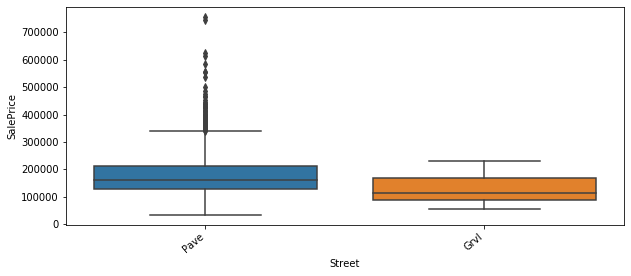

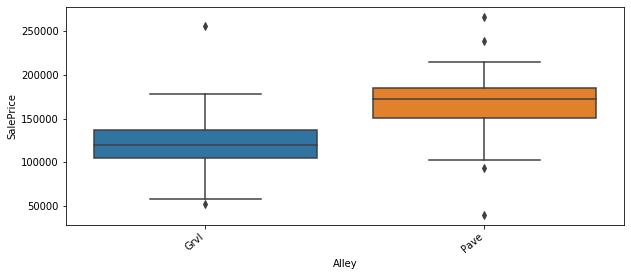

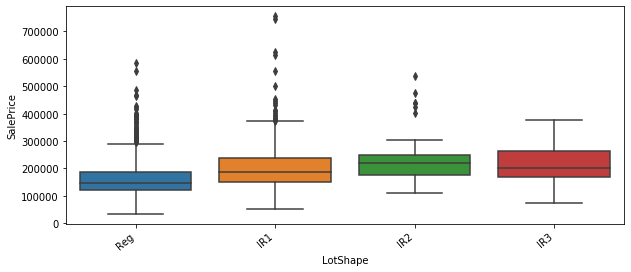

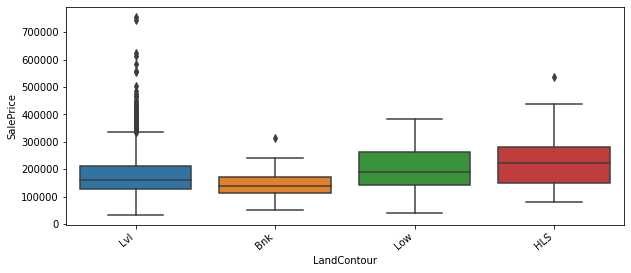

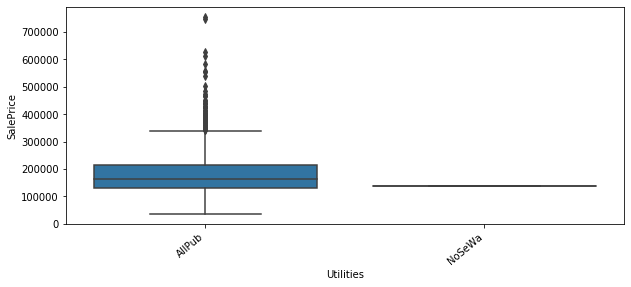

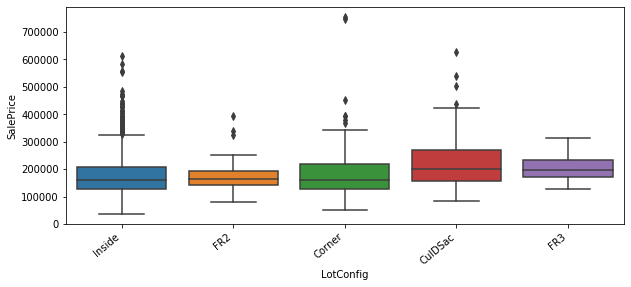

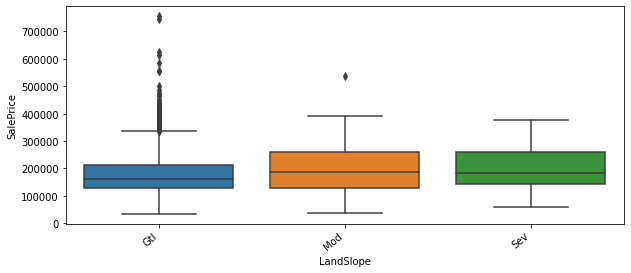

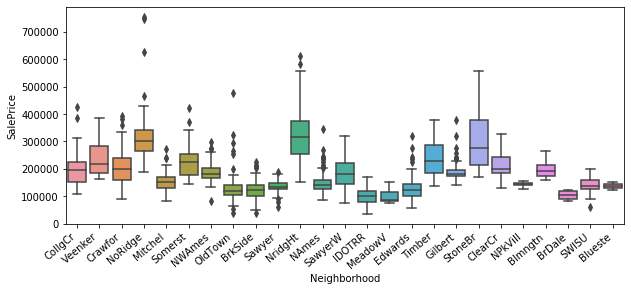

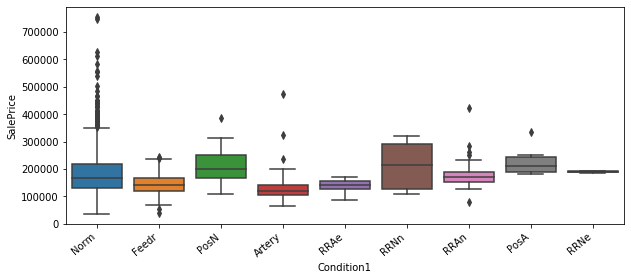

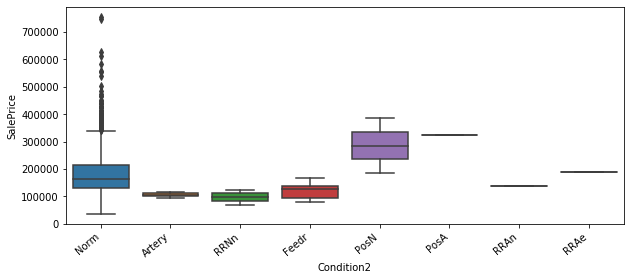

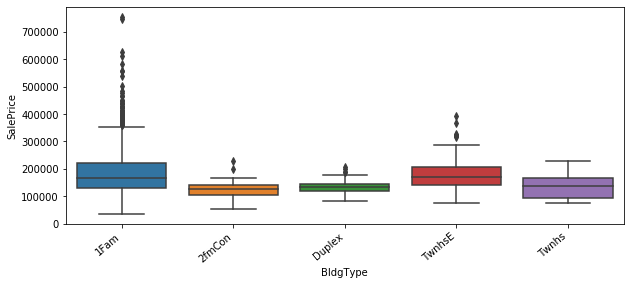

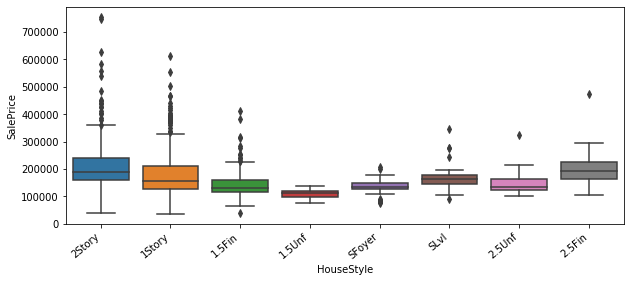

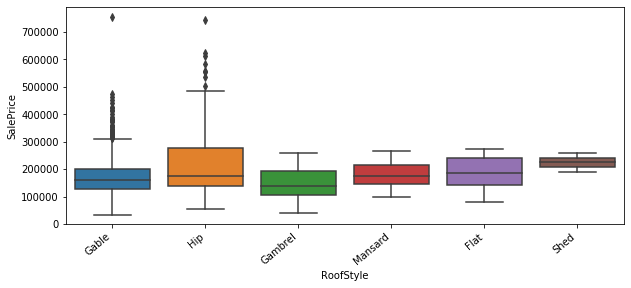

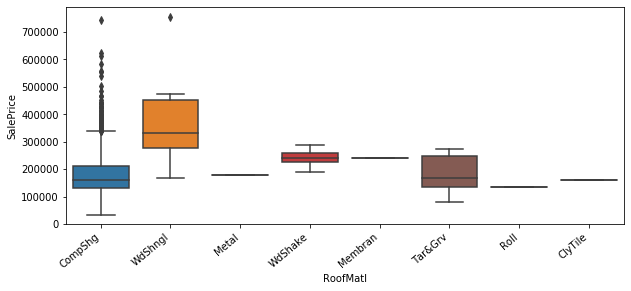

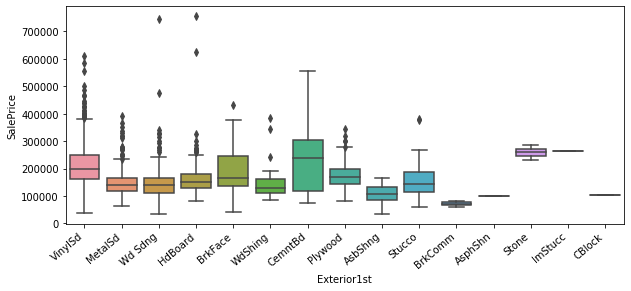

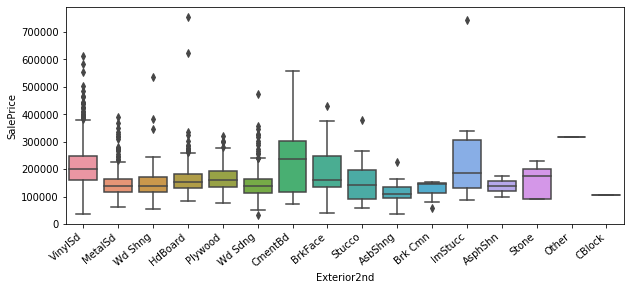

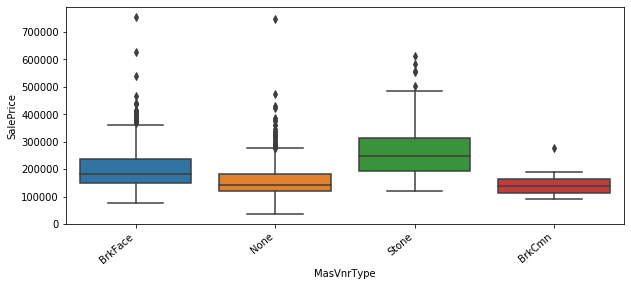

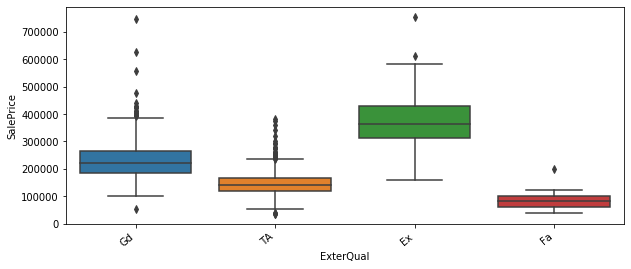

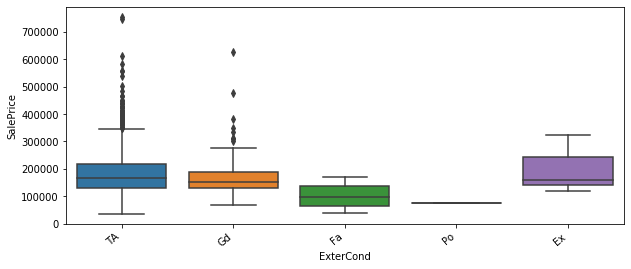

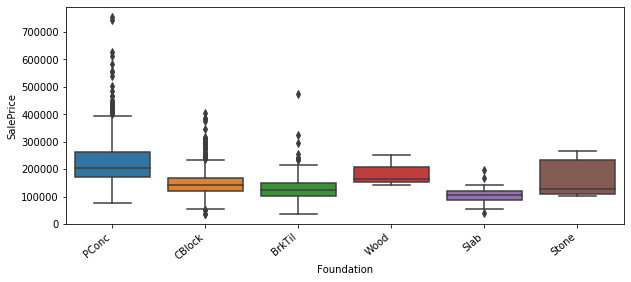

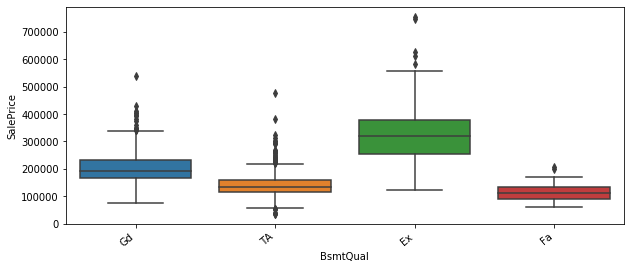

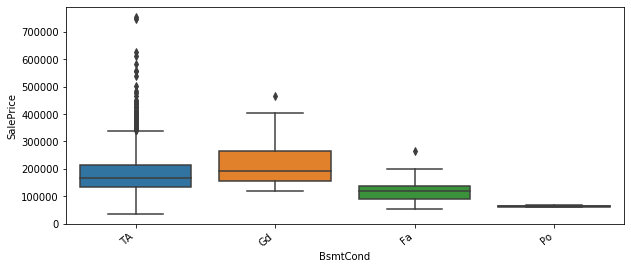

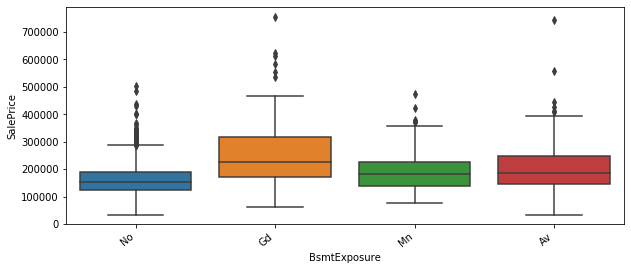

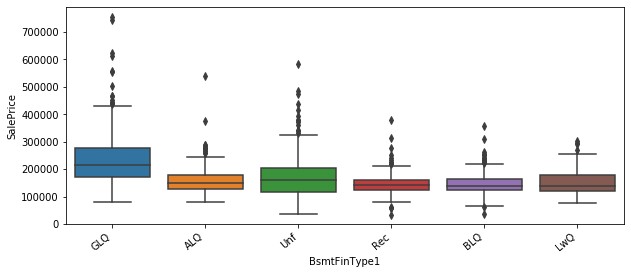

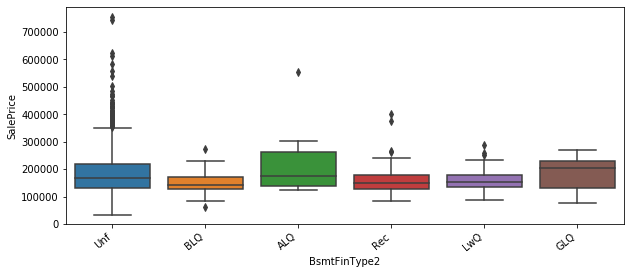

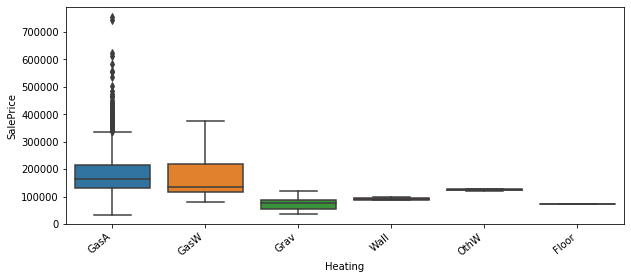

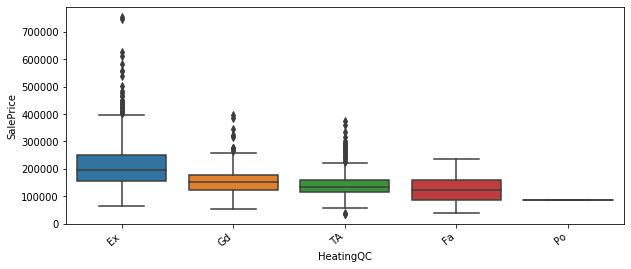

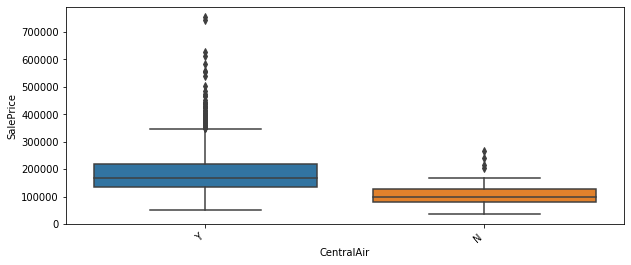

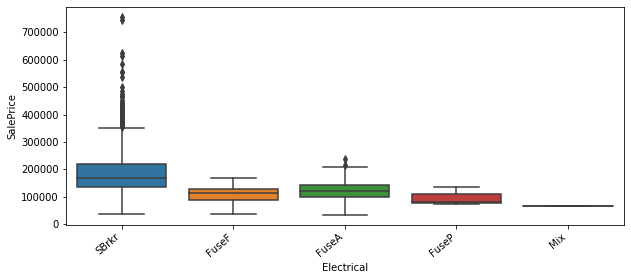

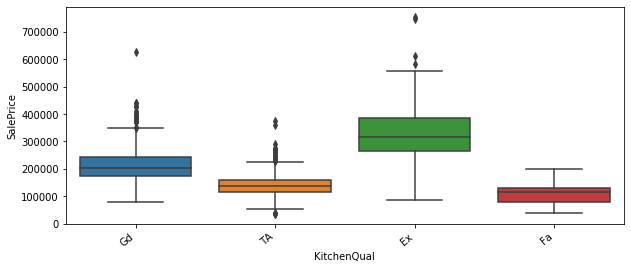

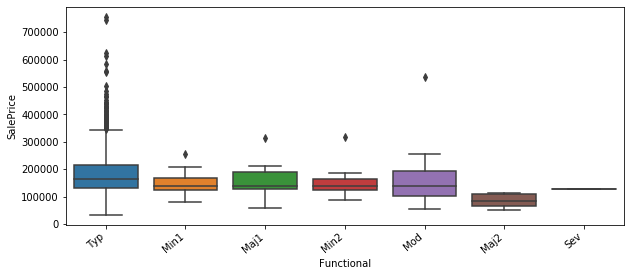

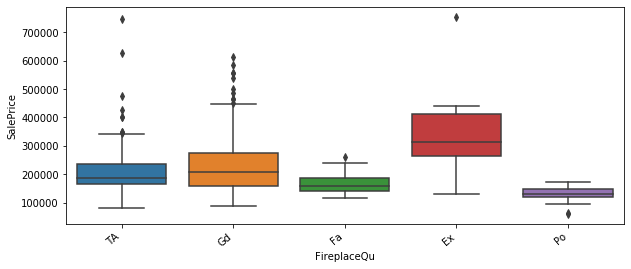

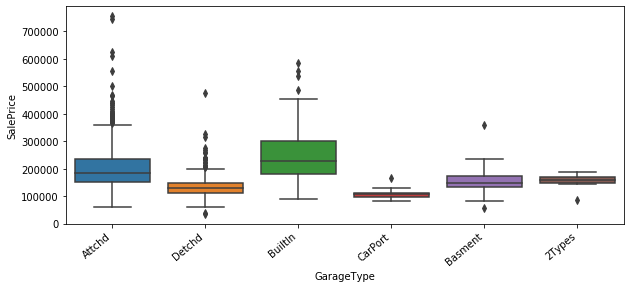

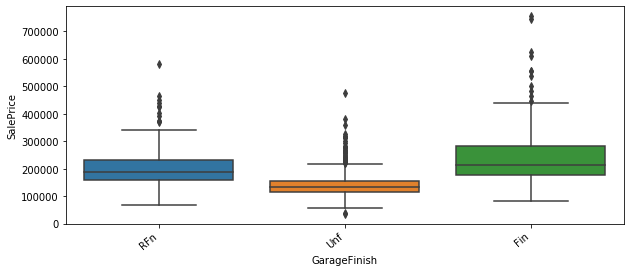

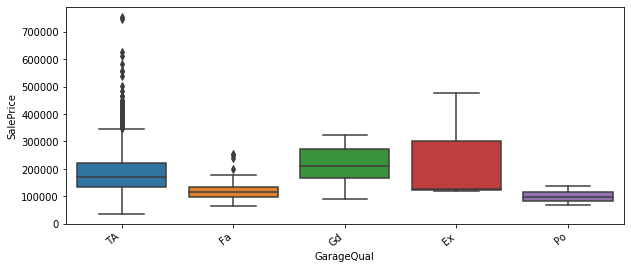

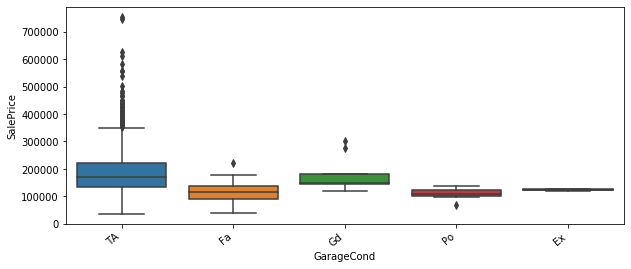

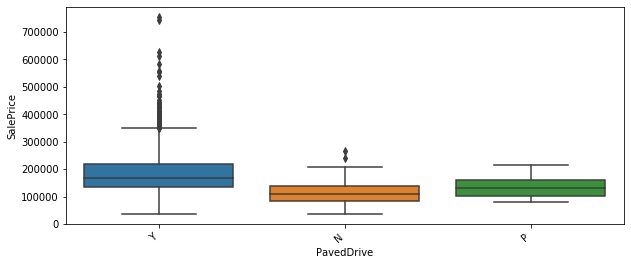

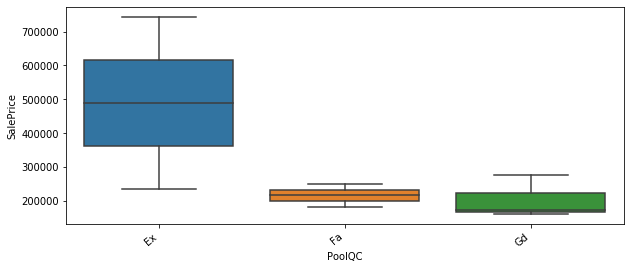

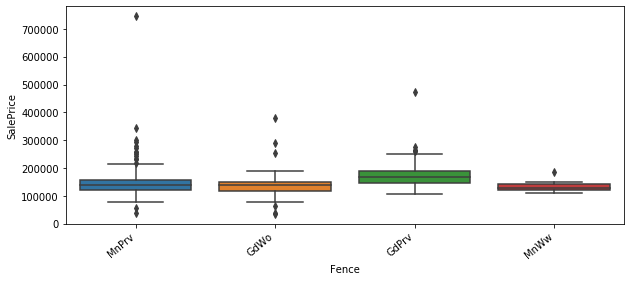

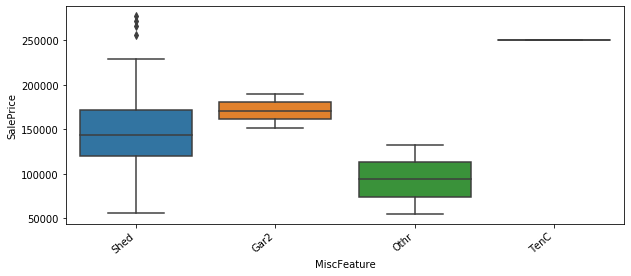

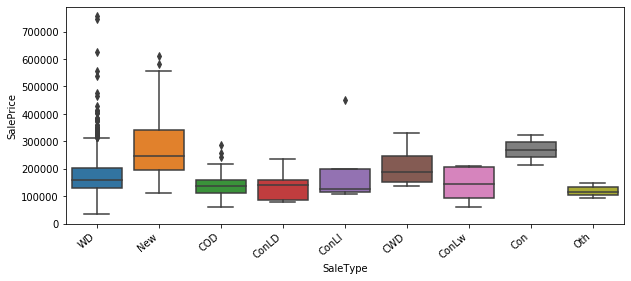

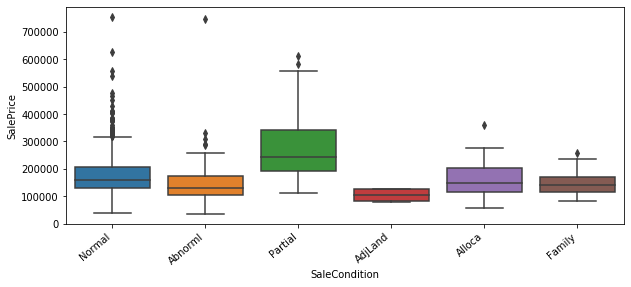

In [250]:
for i, col in enumerate(df_train_qual.columns[:-1]):
    plt.figure(i,figsize=(10,4))
    g = sns.boxplot(x=col, y='SalePrice',data=df_train_qual)
    g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")


By rough inspection of the box plots, these qualitative variables look to have some influence on SalePrice:
* `MSZoning`
* `Neighborhood`
* `Condition1`
* `Condition2`
* `HouseStyle`
* `Exterior1st`
* `Exterior2nd`
* `ExterQual`
* `BsmtQual`
* `CentralAir`
* `KitchenQual`
* `FireplaceQu`
* `GarageType`
* `PoolQC`
* `SaleType`
* `SaleCondition`

The box plots suggest that out of 43 qualitative features, only about 12 have influence on SalePrice.

As with quantitative features there is also possibility of multicollinearity, for example, ExterQual and ExterCond.

### 3.3 Summary

From the analysis above it appears that some of the most important qualitative features to predict SalePrice are:
* `OverallQual`
* `GrLivArea`
* `GarageCars`

From the analysis above it appears that some of the most important quantitative features to predict SalePrice are:
* `MSZoning`
* `Neighborhood`
* `SaleType`
* `SaleCondition`

## 4. Data Cleaning

In order to clean the datasets prior to preparing for a machine learning model, three steps will be taken:
1. Remove outliers
2. Address missing values in the training and test sets
3. Transform the distribution of `SalePrice` in the training set

### 4.1 Outliers

A scatterplot of GrLivArea vs SalePrice shows four observations that are outliers, homes with a GrLivArea larger than 4000 square feet.

It is recomended by the author of this dataset to remove all homes with a GrLivArea larger than 4000 square feet (http://jse.amstat.org/v19n3/decock.pdf, accessed Aug 29, 2020)

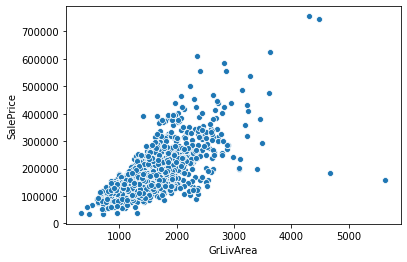

In [251]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df_train)

In [252]:
df_train[df_train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [253]:
df_train.drop(df_train[df_train['GrLivArea'] > 4000].index,inplace=True)

In [254]:
df_train[df_train['GrLivArea'] > 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### 4.2 Missing Data

In this section, a strategy for dealing with missing data will be developed first for the training set, and then applied to the test set.

#### 4.2.1 Training set

The training set is missing many values, in particular for `PoolQC`, `MiscFeature`, `Alley` and `Fence`:

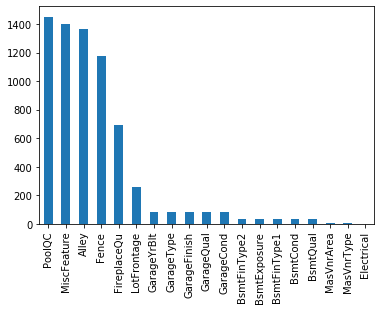

In [255]:
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=False,inplace=True)
missing_data.plot(kind='bar')

In [256]:
percent_missing = round(missing_data / len(df_train) * 100, 1)
missing_data_df = pd.concat([missing_data,percent_missing],axis=1,keys=['Missing Count','Missing % (of total)'])
missing_data_df

,Missing Count,Missing % (of total)
PoolQC,1451,99.7
MiscFeature,1402,96.3
Alley,1365,93.8
Fence,1176,80.8
FireplaceQu,690,47.4
LotFrontage,259,17.8
GarageYrBlt,81,5.6
GarageType,81,5.6
GarageFinish,81,5.6
GarageQual,81,5.6


The strategy to deal with missing values has four steps, which are described below.

**Step 1.**
In this case the Pandas python library (used so far to store/manipulate the data) is interpreting "NA" or "None" values as missing values. For this reason qualitative features are interpreted as having missing values when according to the data description, the house does not have that feature. For example, PoolQC = NA when there is no pool (only 7 out of 1460 houses have pool). These features with missing values should be dealt with case by case:
* `PoolQC` missing values filled in as NoPool
* `MiscFeature` missing values filled in as NoMisc
* `Alley` missing values filled in as NoAlley
* `Fence` missing values filled in as NoFence
* `FireplaceQu` missing values filled in as NoFireplace
* `Garage____` missing values filled in as NoGarage
* `GarageYrBlt` is strongly correlated with YearBuilt, so will be dropped. Filling in a value for NoGarage will result in a column with mixed numerical/categorical data.
* `Bsmt____` missing values filled in as NoBsmt

In [257]:
df_train['PoolQC'].fillna(value='NoPool',inplace=True)
df_train['MiscFeature'].fillna(value='NoMisc',inplace=True)
df_train['Alley'].fillna(value='NoAlley',inplace=True)
df_train['Fence'].fillna(value='NoFence',inplace=True)
df_train['FireplaceQu'].fillna(value='NoFireplacec',inplace=True)

df_train.drop('GarageYrBlt',axis=1,inplace=True)
df_train['GarageType'].fillna(value='NoGarage',inplace=True)
df_train['GarageFinish'].fillna(value='NoGarage',inplace=True)
df_train['GarageQual'].fillna(value='NoGarage',inplace=True)
df_train['GarageCond'].fillna(value='NoGarage',inplace=True)

df_train['BsmtFinType2'].fillna(value='NoBsmt',inplace=True)
df_train['BsmtExposure'].fillna(value='NoBsmt',inplace=True)
df_train['BsmtFinType1'].fillna(value='NoBsmt',inplace=True)
df_train['BsmtCond'].fillna(value='NoBsmt',inplace=True)
df_train['BsmtQual'].fillna(value='NoBsmt',inplace=True)

**Step 2.**
`LotFrontage` missing values will be filled in with the average value from the neighborhood.

In [258]:
look = df_train.groupby('Neighborhood')[['Neighborhood','LotFrontage']].agg('mean').reset_index()[['Neighborhood','LotFrontage']]
look

,Neighborhood,LotFrontage
0,Blmngtn,47.142857
1,Blueste,24.000000
2,BrDale,21.562500
3,BrkSide,57.509804
4,ClearCr,83.461538
5,CollgCr,71.682540
6,Crawfor,71.804878
7,Edwards,64.811111
8,Gilbert,79.877551
9,IDOTRR,62.500000


In [259]:
look[(look['Neighborhood'] == 'Gilbert')]['LotFrontage'].values[0]

79.87755102040816

In [260]:
def impute_LotFrontage(columns):
    
    Neighborhood = columns[0]
    LotFrontage = columns[1]
    
    if pd.isnull(LotFrontage):
        return look[(look['Neighborhood'] == Neighborhood)]['LotFrontage'].values[0]
    else:
        return LotFrontage
    

In [261]:
df_train['LotFrontage'] = df_train[['Neighborhood','LotFrontage']].apply(impute_LotFrontage,axis=1)

**Step 3.**
`MasVnrArea` missing values will be filled in with average value. `MasVnrType` missing values will be filled in with NoMas.

In [262]:
df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].mean(),inplace=True)
df_train['MasVnrType'].fillna(value='NoMas',inplace=True)

**Step 4.**
`Electrical` is only missing 1 value, so it will be filled in with most common value. The assumption is that filling in with most common value is less of an impact than deleting row and the information contained within its features. 

In [263]:
df_train['Electrical'].fillna(value=df_train['Electrical'].mode()[0],inplace=True)

Final check for missing values (should be a value of 0):

In [264]:
df_train.isnull().sum().max()

0

#### 4.2.2 Test set

The test set contains many of the same missing values, so a similar strategy to what was used for the training set is now applied to the test set.

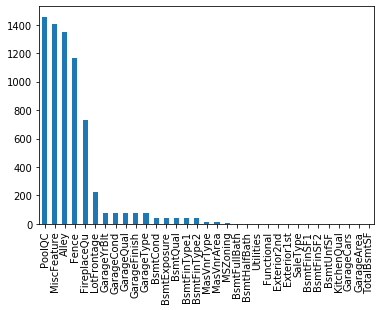

In [265]:
missing_test_data = df_test.isnull().sum()
missing_test_data = missing_test_data[missing_test_data > 0]
missing_test_data.sort_values(ascending=False,inplace=True)
missing_test_data.plot(kind='bar')

In [266]:
percent_test_missing = round(missing_test_data / len(df_test) * 100, 1)
missing_test_data_df = pd.concat([missing_test_data,percent_test_missing],axis=1,keys=['Missing Count','Missing % (of total)'])
missing_test_data_df

,Missing Count,Missing % (of total)
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageYrBlt,78,5.3
GarageCond,78,5.3
GarageQual,78,5.3
GarageFinish,78,5.3


**Step 1.**
Same as for the training set.

In [267]:
df_test['PoolQC'].fillna(value='NoPool',inplace=True)
df_test['MiscFeature'].fillna(value='NoMisc',inplace=True)
df_test['Alley'].fillna(value='NoAlley',inplace=True)
df_test['Fence'].fillna(value='NoFence',inplace=True)
df_test['FireplaceQu'].fillna(value='NoFireplace',inplace=True)

df_test.drop('GarageYrBlt',axis=1,inplace=True)
df_test['GarageType'].fillna(value='NoGarage',inplace=True)
df_test['GarageFinish'].fillna(value='NoGarage',inplace=True)
df_test['GarageQual'].fillna(value='NoGarage',inplace=True)
df_test['GarageCond'].fillna(value='NoGarage',inplace=True)

df_test['BsmtFinType2'].fillna(value='NoBsmt',inplace=True)
df_test['BsmtExposure'].fillna(value='NoBsmt',inplace=True)
df_test['BsmtFinType1'].fillna(value='NoBsmt',inplace=True)
df_test['BsmtCond'].fillna(value='NoBsmt',inplace=True)
df_test['BsmtQual'].fillna(value='NoBsmt',inplace=True)

**Step 2.**
Same as for the training set.

In [268]:
look_test = df_test.groupby('Neighborhood')[['Neighborhood','LotFrontage']].agg('mean').reset_index()[['Neighborhood','LotFrontage']]
look_test

,Neighborhood,LotFrontage
0,Blmngtn,46.333333
1,Blueste,28.125000
2,BrDale,21.428571
3,BrkSide,53.795455
4,ClearCr,96.857143
5,CollgCr,70.872340
6,Crawfor,68.142857
7,Edwards,65.511628
8,Gilbert,69.725806
9,IDOTRR,62.075472


In [269]:
def impute_LotFrontage_test(columns):
    
    Neighborhood = columns[0]
    LotFrontage = columns[1]
    
    if pd.isnull(LotFrontage):
        return look_test[(look['Neighborhood'] == Neighborhood)]['LotFrontage'].values[0]
    else:
        return LotFrontage
    

In [270]:
df_test['LotFrontage'] = df_test[['Neighborhood','LotFrontage']].apply(impute_LotFrontage_test,axis=1)

**Step 3.**
Same as for the training set.

In [271]:
df_test['MasVnrArea'].fillna(value=df_test['MasVnrArea'].mean(),inplace=True)
df_test['MasVnrType'].fillna(value='NoMas',inplace=True)

**Step 4.**
Same as for the training set.

In [272]:
df_test['Electrical'].fillna(value=df_test['Electrical'].mode()[0],inplace=True)

Check for missing values:

In [273]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

After applying the same four steps used in the training set to the test set, there are still some missing values which will have to be inspected individually.

The following features will have their missing values replaced with the most common (mode) value for the corresponding neighborhood:
* `MSZoning`
* `Utilities`
* `Exterior1st`
* `KitchenQual`

In [274]:
df_test[df_test['MSZoning'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.000000,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.000000,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Abnorml
790,2251,70,NaN,62.075472,56600,Pave,NoAlley,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NoFireplace,Detchd,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,1,2008,WD,Normal
1444,2905,20,NaN,125.000000,31250,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NoFireplace,Attchd,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NoPool,NoFence,NoMisc,0,5,2006,WD,Normal


In [275]:
MSZoning_mode_IDOTRR = df_test[(df_test['Neighborhood'] == 'IDOTRR')]['MSZoning'].mode()[0]
MSZoning_mode_Mitchel = df_test[(df_test['Neighborhood'] == 'Mitchel')]['MSZoning'].mode()[0]

df_test.at[455,'MSZoning'] = MSZoning_mode_IDOTRR
df_test.at[756,'MSZoning'] = MSZoning_mode_IDOTRR
df_test.at[790,'MSZoning'] = MSZoning_mode_IDOTRR

df_test.at[1444,'MSZoning'] = MSZoning_mode_Mitchel

In [276]:
df_test[df_test['Utilities'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RM,109.000000,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMisc,0,3,2009,ConLD,Normal
485,1946,20,RL,69.725806,31220,Pave,NoAlley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NoPool,NoFence,Shed,750,5,2008,WD,Normal


In [277]:
Utilities_mode_IDOTRR = df_test[(df_test['Neighborhood'] == 'IDOTRR')]['Utilities'].mode()[0]
Utilities_mode_Gilbert = df_test[(df_test['Neighborhood'] == 'Gilbert')]['Utilities'].mode()[0]

df_test.at[455,'Utilities'] = Utilities_mode_IDOTRR

df_test.at[485,'Utilities'] = Utilities_mode_Gilbert

In [278]:
df_test[df_test['Exterior1st'].isnull() == True]

#also shows 1 missing Exterior2nd value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NoGarage,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,0,39,0,0,0,0,NoPool,NoFence,NoMisc,0,1,2008,WD,Normal


In [279]:
Exterior1st_mode_Edwards = df_test[(df_test['Neighborhood'] == 'Edwards')]['Exterior1st'].mode()[0]
Exterior2nd_mode_Edwards = df_test[(df_test['Neighborhood'] == 'Edwards')]['Exterior2nd'].mode()[0]

df_test.at[691,'Exterior1st'] = Exterior1st_mode_Edwards

df_test.at[691,'Exterior2nd'] = Exterior2nd_mode_Edwards

In [280]:
df_test[df_test['KitchenQual'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NoFireplace,Detchd,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NoPool,NoFence,NoMisc,0,1,2010,COD,Normal


In [281]:
df_test.at[95,'KitchenQual'] = df_test[(df_test['Neighborhood'] == 'Edwards')]['Exterior1st'].mode()[0]

By inspecting the data, the house with a missing `BsmtFinSF1` value actually has no basement, so basement related features are set to either 0.

In [282]:
df_test[df_test['BsmtFinSF1'].isnull() == True]

#also shows other missing basement values. This house has no basement, fill in with 0 square feet or 0 Bath

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NoBsmt,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NoFireplace,Detchd,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,4,2008,ConLD,Abnorml


In [283]:
df_test.at[660,'BsmtFinSF1'] = 0
df_test.at[660,'BsmtFinSF2'] = 0
df_test.at[660,'BsmtUnfSF'] = 0
df_test.at[660,'TotalBsmtSF'] = 0

df_test.at[660,'BsmtFullBath'] = 0
df_test.at[660,'BsmtHalfBath'] = 0

`BsmtFullBath` missing values are for a house with no basement, so these values are set to 0.

In [284]:
df_test[df_test['BsmtFullBath'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
728,2189,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NoPool,NoFence,NoMisc,0,7,2008,WD,Normal


In [285]:
df_test.at[728,'BsmtFullBath'] = 0
df_test.at[728,'BsmtHalfBath'] = 0

`Functional` missing values are set to 'Typ':

In [286]:
df_test[df_test['Functional'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RM,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NoFireplace,Detchd,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NoPool,NoFence,NoMisc,0,9,2007,COD,Abnorml


In [287]:
df_test.at[756,'Functional'] = 'Typ'
df_test.at[1013,'Functional'] = 'Typ'

Missing `GarageCars` and `GarageArea` values correspond to a house that has been set to have NoGarage, so the missing values are set to 0.

In [288]:
df_test[df_test['GarageCars'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NoFireplace,Detchd,NoGarage,NaN,NaN,NoGarage,NoGarage,Y,174,0,212,0,0,0,NoPool,MnPrv,NoMisc,0,3,2007,WD,Alloca


In [289]:
df_test.at[1116,'GarageCars'] = 0
df_test.at[1116,'GarageArea'] = 0

The missing `SaleType` is set to be the most commonly occuring type of sale.

In [290]:
df_test[df_test['SaleType'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMisc,0,10,2007,NaN,Normal


In [291]:
df_test.at[1029,'SaleType'] = df_test['SaleType'].value_counts().max()

Final check for missing values (should be a value of 0).

In [292]:
df_test.isnull().sum().max()

0

### 4.3 Log Transform of SalePrice

In Section 3.1 it was shown that the `SalePrice` distribution was right skewed. Taking the logarithm of the values will make the distribution more normal.

In [293]:
# log transform (natural log) SalePrice to make distribution more normal
df_train['SalePrice'] = np.log(df_train['SalePrice'])

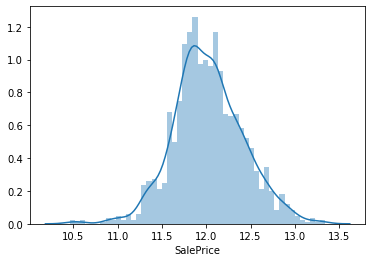

In [294]:
sns.distplot(df_train['SalePrice'],bins=50)

## 5. Data Preparation

In order to prepare the data for machine learning, the quantitative features must be scaled and the qualitative features must be one-hot encoded with dummy variables.

Scaling and one-hot encoding are achieved here by appending the test set to the training set, creating one combined dataset. The train and test sets may have differing number of value counts for the qualitative features, so if the two sets are treated separately they may end up with a different number of columns after one-hot encoding. Combining the two sets solves this problem.

The index where the test data begins will be saved so that the data can be separated later, and so test data does not leak into the training set. When the qualitative data is scaled, it is only based on calculations from the training set.

Since data cleaning eliminated some rows, the dataframe shapes are checked:

In [295]:
df_train.shape

(1456, 80)

In [296]:
df_test.shape

(1459, 79)

After resetting the index of the training data, the final index number is actually 1455, meaning that the first test index in a combined dataset would be 1456.

In [297]:
df_train_end = df_train.reset_index(inplace=False, drop=True)
df_train_end.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1451,1456,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NoPool,NoFence,NoMisc,0,8,2007,WD,Normal,12.072541
1452,1457,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NoPool,MnPrv,NoMisc,0,2,2010,WD,Normal,12.254863
1453,1458,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal,12.493130
1454,1459,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NoFireplacec,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NoPool,NoFence,NoMisc,0,4,2010,WD,Normal,11.864462
1455,1460,20,RL,75.0,9937,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NoFireplacec,Attchd,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NoPool,NoFence,NoMisc,0,6,2008,WD,Normal,11.901583


`first_test_index` stores the index of the first sample in the test data.

In [298]:
first_test_index = 1456

The train and test sets are combined:

In [299]:
df_combined = df_train.append(df_test)
df_combined.reset_index(inplace=True,drop=True)

Quantitative features are separated into a new dataframe:

In [300]:
quant_list = ['SalePrice','Id','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
              'TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage',
              'WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr',
              'ScreenPorch','PoolArea','MoSold','3SsnPorch','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF',
              'YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']

In [301]:
df_quant = df_combined[quant_list]

The quantitative features are scaled, based on information from the training set only (the `scaler.fit()` function only refers to records before `first_test_index`, which are from the training set).

In [302]:
df_to_scale = df_quant.drop(['SalePrice','Id'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# only fit to rows in dataframe from the training set
scaler.fit(df_to_scale[:first_test_index])

scaled_features = scaler.transform(df_to_scale)

In [303]:
df_quant_scaled = pd.DataFrame(scaled_features,columns=df_to_scale.columns)

Qualitative features are separated, and then one-hot encoded dummy variables are created:

In [304]:
df_qual = df_combined.drop(quant_list,axis=1)

In [305]:
df_qual_dummy = pd.get_dummies(df_qual,drop_first=True)

The scaled quantitative data and one-hot encoded qualitative data are recombined:

In [306]:
df_sale_id = df_combined[['SalePrice','Id']]
df_combined_final = pd.concat([df_sale_id,df_quant_scaled,df_qual_dummy],axis=1)

In [307]:
df_combined_final.shape

(2915, 263)

The training set is recovered from the combined data:

In [308]:
df_train_final = df_combined_final[:first_test_index]

In [309]:
df_train_final.head()

,SalePrice,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_NoMisc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.247694,1,0.665646,0.409745,0.315804,0.360672,-0.472456,-0.815613,0.800349,0.927120,1.053769,0.880629,0.531208,-0.951673,0.625446,-0.253333,-0.749775,1.183333,0.226218,1.231823,-0.202770,1.114055,-0.943320,0.165909,-0.270606,-0.058115,-1.603837,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,0.137472,-0.517461,0.073476,-0.359882,-0.211757,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,12.109011,2,-0.064709,-0.492308,0.315804,-0.054591,0.512947,0.284120,0.800349,-0.314155,0.159469,-0.427190,-0.577452,0.610487,1.257846,0.450240,1.631381,-0.796357,-0.707503,-0.758781,-0.086107,-0.819275,-0.640184,0.165909,-0.270606,-0.058115,-0.491667,-0.116501,-0.289082,3.967098,-0.087809,-0.120409,-0.615009,2.176545,-0.871172,-0.359882,-0.211757,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,12.317167,3,0.665646,0.562772,0.315804,0.643806,-0.317122,-0.642256,0.800349,-0.314155,0.987524,0.832191,0.338890,0.610487,0.113946,-0.112619,-0.749775,1.211151,-0.064613,1.231823,0.081281,1.114055,-0.300852,0.165909,-0.270606,-0.058115,0.991227,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,0.137472,-0.517461,0.073476,-0.359882,-0.211757,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,11.849398,4,0.665646,0.423840,1.656362,0.804249,-0.715166,-0.531200,-1.026153,0.306482,-1.860986,-0.717817,-0.577452,0.610487,-0.513805,-0.487858,-0.749775,0.956156,-0.171761,-0.758781,-0.091179,1.114055,-0.061058,0.165909,-0.270606,-0.058115,-1.603837,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,-1.367490,-0.517461,0.309638,4.086653,-0.211757,0,0,1,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,12.429216,5,1.396000,1.392339,1.656362,1.719716,0.228976,-0.032798,0.800349,1.547757,0.954402,0.735316,1.402298,0.610487,0.506871,0.637859,0.784392,1.644643,0.578277,1.231823,0.386636,1.114055,-0.174169,1.392121,-0.270606,-0.058115,2.103397,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,0.137472,-0.517461,0.073476,-0.359882,-0.211757,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [310]:
df_train_final.shape

(1456, 263)

Due to one-hot encoding, the number of features in the training set has grown from 79 to 261 (263 subtract 1 for `SalePrice`, subtract 1 for `Id`).

The test data is also recovered from the combined data:

In [311]:
df_test_final = df_combined_final[first_test_index:]
df_test_final = df_test_final.drop(['SalePrice'],axis=1)

In [312]:
df_test_final.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,ScreenPorch,PoolArea,MoSold,3SsnPorch,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_NoMisc,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1456,1461,-0.795063,-1.229253,-1.024753,1.219513,-0.409352,-0.707265,-1.026153,-0.934793,-0.337364,-1.153757,-0.577452,-0.951673,0.072096,0.450240,0.368889,-0.796357,-0.707503,-0.758781,0.119019,-0.819275,-0.671855,-1.060303,1.879576,-0.058115,-0.120943,-0.116501,0.602742,-0.239817,-0.087809,-0.120409,1.642435,0.380541,-0.871172,-0.359882,-0.211757,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,1462,-0.064709,-0.357402,-1.024753,-0.752989,0.675563,0.465603,-1.026153,-0.314155,-0.436731,-1.299070,0.033442,-0.951673,1.129971,0.497144,2.390474,-0.796357,-0.156454,1.231823,0.387346,-0.819275,-0.364194,0.165909,-0.270606,-0.058115,-0.120943,-0.116501,-0.289082,-0.239817,25.081904,-0.120409,1.642435,0.380541,-0.871172,-0.359882,-0.211757,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,1463,-0.795063,0.246651,0.315804,0.049224,-0.297705,-0.620587,0.800349,-0.314155,0.855035,0.638440,-0.577452,0.610487,0.823071,0.168810,0.944202,0.828658,-0.187068,1.231823,0.343014,-0.819275,-0.972729,0.165909,-0.270606,-0.058115,-1.233113,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,1.642435,-0.517461,0.073476,-0.359882,-0.211757,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1459,1464,-0.064709,0.196313,0.315804,-0.007402,-0.302559,-0.626004,0.800349,0.306482,0.888158,0.638440,-0.464323,0.610487,0.383646,0.356430,2.126789,0.775341,-0.156454,1.231823,-0.047760,-0.819275,-0.549696,0.165909,-0.270606,-0.058115,-0.120943,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,1.642435,0.380541,0.073476,-0.359882,-0.211757,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1460,1465,1.396000,-0.456065,0.315804,0.162478,0.556635,0.332876,0.800349,-0.934793,0.689424,0.347814,-0.577452,-0.951673,-0.404529,-1.285240,-0.749775,-0.796357,0.547664,-0.758781,-0.552255,-0.819275,1.018017,-1.060303,2.309612,-0.058115,-1.974560,-0.116501,-0.289082,-0.239817,-0.087809,-0.120409,1.642435,-0.517461,1.490448,-0.359882,-0.211757,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [313]:
df_test_final.shape

(1459, 262)

## 6. Building a Machine Learning Model

In the exploratory data analysis, several possible important features related to the SalePrice were identified. 

Since the dataset has so many features, it is desired to choose a model that can select the features most responsible for the variance in SalePrice, without having to manually choose. It is also desired to have as few coefficients as possible for simplicity and to avoid problems with multicollinearity between features.

For the reasons above, the Lasso regression model will be used, as it has the property of only providing regression coefficients for variables that influence the target (Lasso regression performs variable selection by forcing some coefficients to be equal to exactly 0 using an L1 penalty).

### 6.1 Lasso Regression Model

The sections below describe the development of a Lasso regression model.

#### 6.1.1 Build Model

The following code builds and trains a Lasso model using the scikit-learn Python library:

In [314]:
X_train = df_train_final.drop(['SalePrice','Id'],axis=1)
y_train = df_train_final['SalePrice']

In [315]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(cv=5,random_state=101)

model_lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=101, selection='cyclic',
        tol=0.0001, verbose=False)

In [316]:
model_lasso.alpha_

0.0003243730441783255

In [317]:
model_lasso.intercept_

11.659918552330122

#### 6.1.2 Examining the Regression Coefficients

The code that follows displays the regression coefficients for the features that the Lasso model selected, as well as the features that the model did not select, where the coefficients are equal to 0.

In [319]:
# Non-zero coefficients (features that explain variance in SalePrice)

model_lasso_coef = pd.DataFrame(model_lasso.coef_,index=X_train.columns,columns=['LassoCV Coef'])

model_lasso_coef[model_lasso_coef['LassoCV Coef'] != 0].sort_values(ascending=False,by='LassoCV Coef')

#plot_coef = model_lasso_coef[model_lasso_coef['LassoCV Coef'] != 0].sort_values(by='LassoCV Coef')
#plot_coef.plot(kind='barh',figsize=(30,30))
#plt.tight_layout()

,LassoCV Coef
MSZoning_FV,0.135789
MSZoning_RL,0.127110
GrLivArea,0.126386
Neighborhood_Crawfor,0.120398
MSZoning_RH,0.099472
Neighborhood_StoneBr,0.086759
Functional_Typ,0.082225
SaleType_New,0.079072
OverallQual,0.072465
MSZoning_RM,0.068996


In [320]:
# Zero coefficients (features that do not explain variance in SalePrice)

model_lasso_coef[model_lasso_coef['LassoCV Coef'] == 0]

,LassoCV Coef
2ndFlrSF,0.0
BsmtUnfSF,-0.0
BsmtHalfBath,-0.0
LotShape_IR3,-0.0
LotShape_Reg,0.0
LandContour_HLS,0.0
LandContour_Low,-0.0
LandContour_Lvl,0.0
Utilities_NoSeWa,-0.0
LotConfig_FR3,-0.0


In [321]:
num_feat_orig = len(df_train_final.columns) - 2 # subtract 2: 1 for SalePrice (target), 1 for Id (not a feature)
num_feat_lasso = len(model_lasso_coef[model_lasso_coef['LassoCV Coef'] != 0])

print(f'# of features in training set, after scaling and creating dummy variables: ', num_feat_orig)
print(f'# of features selected by Lasso regression: ', num_feat_lasso)

# of features in training set, after scaling and creating dummy variables:  261
# of features selected by Lasso regression:  124


#### 6.1.3 Interpretation of the Lasso model

As expected OverallQual and GrLivArea rank highly in the coefficients, as well as the neighborhood qualitative variable. Interestingly KitchenQual_Gd is the largest negative coefficient.

There are many features that the Lasso model has set the coefficients equal to zero. Out of 261 available features, 124 were selected. Some neighborhoods, as well as several of the HouseStyles, Condition1 and Condition2 are not selected by the model to explain the variance in SalePrice. Many of the features not selected seem to be in common with the neighborhood, which would mean multicollinearity, which would explain why they are not selected.

#### 6.1.4 Generating Predictions with the Lasso Model

With a trained model, it is possible to make predictions for the `SalePrice` on the test set:

In [322]:
X_test = df_test_final.drop(['Id'],axis=1)

In [323]:
predictions_lasso = model_lasso.predict(X_test)

# Undo log transform of SalePrice
predictions = np.e ** predictions_lasso

In [324]:
index = df_test_final['Id']
submission_df = {'Id': index,
                 'SalePrice': predictions}
submission = pd.DataFrame(submission_df)

In [325]:
submission.to_csv("submission v5 lasso.csv",index=False)

# 0.13361

After submitting the predictions to Kaggle for scoring, the RMSE is 0.13361.

### 6.2 Improving Model Performance with Ensembling

In order to try and improve upon the score achieved with the Lasso model, an ensemble model is developed. Ensemble models combine the predictions from several base models in order to reach higher performance.

#### 6.1 Building a Ensemble Model

In this section, a stacking ensemble is developed, which stacks (combines) the predictions from several base models to form the input to a final estimator model. In this case Ridge regression, a random forest, and a gradient boosted regressor are used as base models, and a Lasso regression model is used as the final estimator.


In [326]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LassoCV

from sklearn.ensemble import StackingRegressor

estimators = [
    ('lr', RidgeCV()),
    ('rfr',RandomForestRegressor(random_state=101)),
    ('gbr',GradientBoostingRegressor(random_state=101))
]
     
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=LassoCV(cv=5,random_state=101)
)

stacking_reg.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('lr',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       cv=None, fit_intercept=True,
                                       gcv_mode=None, normalize=False,
                                       scoring=None, store_cv_values=False)),
                              ('rfr',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                 

#### 6.2 Generating Predictions from the Ensemble Model 

Predictions from the ensemble model are made in the same way as for the single Lasso model in Section 6.1.4:

In [327]:
predictions_stacking = stacking_reg.predict(X_test)

# Undo log transform of SalePrice
predictions = np.e ** predictions_stacking

In [328]:
index = df_test_final['Id']
submission_df = {'Id': index,
                 'SalePrice': predictions}
submission = pd.DataFrame(submission_df)

In [329]:
submission.to_csv("submission v5 stacking.csv",index=False)

# 0.12808

After submitting the predictions from the ensemble model to Kaggle for scoring, the RMSE is 0.12808, which is a relative improvement of 4.14% over a Lasso model alone.



## 7. Conclusion

A ensemble machine learning model has been developed to predict the sale prices of homes. The ensemble model has improved performance over a single Lasso regression model, with a RMSE of 0.12808.

In the future, more experimentation with ensemble models could be done to try and improve the score.

## Appendix - Data Description

In [330]:
# open and print data description file for reference
f = open('data_description.txt','r')
text = f.read()
print('DATA DESCRIPTION \n')
print(text)
f.close()

DATA DESCRIPTION 

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Dens